# Popularity of tweets and accounts charts - Fake Covid-19 dataset

Description of Twitter accounts and Tweets from Fake and General Covid-19 Datasets:

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_table
from jupyter_dash import JupyterDash
import altair as alt

df = pd.read_csv('dataset/table2_pag9_paper.csv', sep=';')

app = JupyterDash(__name__)
app.layout = html.Div([
    dash_table.DataTable(
        id='datatable',
        columns=[
            {'name': 'Params', 'id': 'Params'},
            {'name': 'Dataset General', 'id': 'Dataset General'},
            {'name': 'Dataset Fake', 'id': 'Dataset Fake'}],
        data=df.to_dict('records'),
        style_data_conditional=[
        {
            'if': {
                'column_id': 'Params',
            },
            'text-align':'left',
            'width':'250px'
        },
        {
            'if': {
                'column_id': 'Dataset General',
            },
            'text-align':'right',
             'width':'200px'
        },
        {
            'if': {
                'column_id': 'Dataset Fake',
            },
           'text-align':'right',
            'width':'200px'
        }],
        style_header_conditional=[
        {
            'if': {
                'column_id': 'Params',
            },
            'text-align':'left',
            'width':'250px'
        },
        {
            'if': {
                'column_id': 'Dataset General',
            },
            'text-align':'right',
             'width':'200px'
        },
        {
            'if': {
                'column_id': 'Dataset Fake',
            },
           'text-align':'right',
            'width':'200px'
        }],
        style_cell={
            #'textAlign':'left',
            'font-family': 'Helvetica Neue',
            'whiteSpace': 'normal',
            'padding-bottom': '15px',
            'border':'0px solid darkslategray',
            'font-size':'16px',
            'height': 'auto'
            
        },
        style_header={
            'backgroundColor':"#FBFBB8", #moccassin
            'font-family':'Helvetica Neue',
            'font-weight': 'bold',
            'whiteSpace': 'normal',
            'padding': '10px',
            'border-bottom':'1px solid darkslategray',
            'font-size':'18px',
            'height': 'auto'
        },
        style_data={
            'whiteSpace': 'normal',
            'height': 'auto'
        },
        fill_width=False
    ),
    html.Div(id='datatable-container')
])



#if __name__ == '__main__':
#    app.run_server(debug=False)
app.run_server(mode='inline',port=9989)


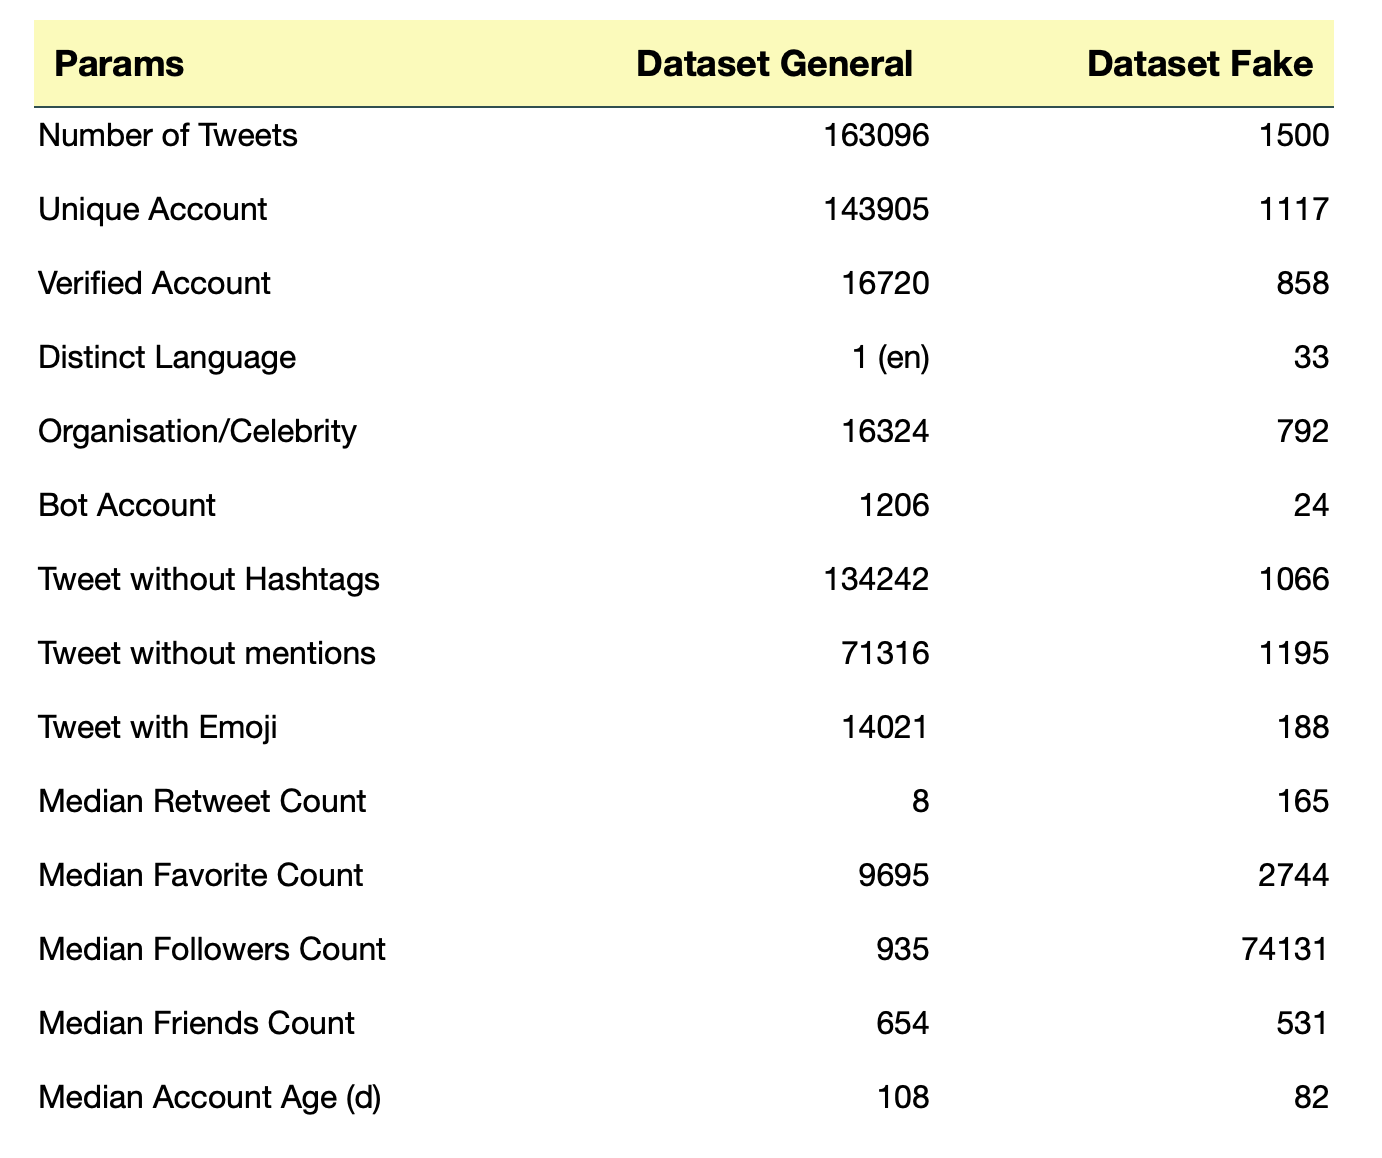

In order to create the bubble chart, we need the following packages:

In [ ]:
import json
from dateutil.parser import parse
import plotly.express as px
import csv
import itertools

To read the JSON file that has all the tweets, it is necessary to do:

In [ ]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We're interested in the user account fields:

In [ ]:
index = 0
names= []
usernames = []
followers = []
following = []
ages = []
likes = []
verified = []
category = []
retweets = []
dates = []

for element in data:
    #favorites_count
    like = data[index]['favorite_count']
    if like > 0:
        likes.append(like)
        #name
        name = data[index]['user']['name']
        names.append(name)

        #screen_name (username)
        user = data[index]['user']['screen_name']
        usernames.append("@"+user)

        #followers_count
        follower = data[index]['user']['followers_count']
        followers.append(follower)

        #friends_count
        friend = data[index]['user']['friends_count']
        following.append(friend)

        #created_at
        age = data[index]['user']['created_at']
        d = parse(age)
        d = d.strftime('%Y/%m/%d')
        ages.append(d)

        #retweet_count
        rt = data[index]['retweet_count']
        retweets.append(rt)

        #verified
        v = data[index]['user']['verified']
        #verified.append(v)

        if v:
           verified.append("Verified")
        else:
           verified.append("Not Verified")

        token_id = data[index]['id_str']
        indice_csv = lista_unica_csv.index(token_id)
        category.append(lista_unica_csv[indice_csv+1].lower())

        token = data[index]['created_at']
        d = parse(token)
        d = d.strftime('%Y/%m/%d')
        dates.append(d)
                        
    index=index+1

## Popularity of Tweets

We create the DataFrames which will be used to realize the chart, one for the Tweets likes count and one for the Tweets retweets count:

In [ ]:
print(len(names))
print(len(usernames))
print(len(ages))
print(len(verified))
print(len(followers))
print(len(following))
print(len(likes))
print(len(category))
print(len(dates))
print(len(retweets))

df = pd.DataFrame(
    {'Name': names,
     'Username': usernames,
     'Account created on': ages,
     'Type of account': verified,
     'Followers count': followers,
     'Friends count': following,
     'Tweet Likes count': likes,
     'Category': category,
     'Date':dates,
     'Tweet Retweets count': retweets,
    })
df['Date']= pd.to_datetime(df['Date'])
#print(df)

#qui

The bubble chart is created:

In [ ]:
range_ = ["#005AB5", "#DC3220"]

a = alt.Chart(df).mark_circle().encode(
    alt.X('Date'),
    alt.Y('Tweet Likes count',scale=alt.Scale(type='log')),
    color=alt.Color('Category',scale=alt.Scale(range=range_)),
    size='Tweet Retweets count',
    tooltip = [
        alt.Tooltip('Name', title='Name'),
        alt.Tooltip('Username', title='Userame'),
        alt.Tooltip('Type of account',title='Type of account'),
        alt.Tooltip('Tweet Likes count',title='Tweet Likes count'),
        alt.Tooltip('Tweet Retweets count',title='Tweet Retweets count'),
        alt.Tooltip('Friends count',title='Friends count'),
        alt.Tooltip('Account created on',title='Account created on')
    ]
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15,
    grid=False
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
).configure_header(
    titleFontSize=16,
    labelFontSize=14
).properties(
    width=600,
    height=500
)

a

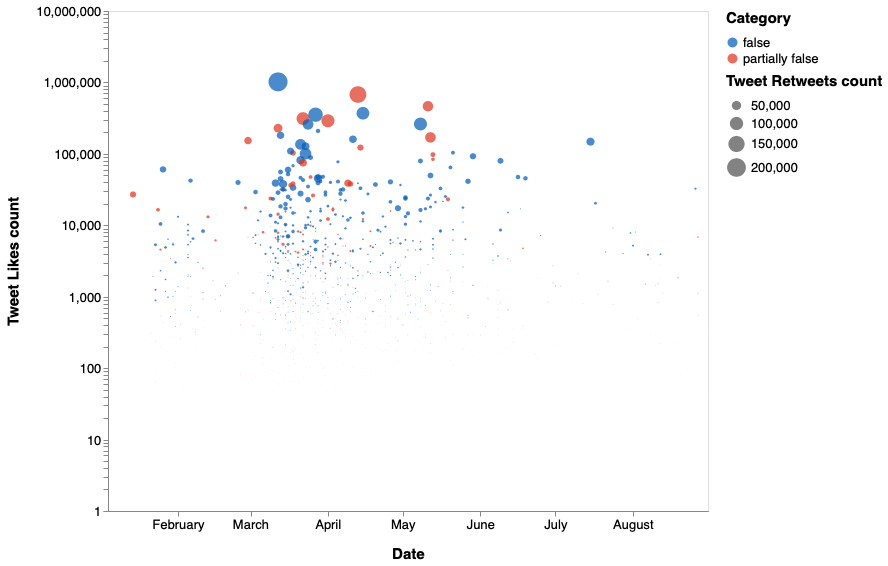

## Popularity of the accounts that tweeted about Covid-19

The chart is created:

In [ ]:
fig = px.scatter(df, hover_data=['Name','Username','Type of account','Tweet Likes count','Tweet Retweets count','Friends count','Account created on'],
                 x="Date", y="Followers count",
                 #size='Likes count',
                 color="Type of account",
                 color_discrete_sequence=["#FFC20A", "#0C7BDC"],
                 template="plotly_white",
                 title="Popularity of the accounts that tweeted about Covid-19 - Fake Covid-19 dataset",
                 labels={"Type of account": "Type of account"}
                )

fig.update_traces(marker=dict(opacity=0.8,line=dict(width=1,
                              color='DarkSlateGrey')),
                              selector=dict(mode='markers'))

fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10)
fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, type="log")

fig.update_yaxes(fixedrange=True)


fig.show()

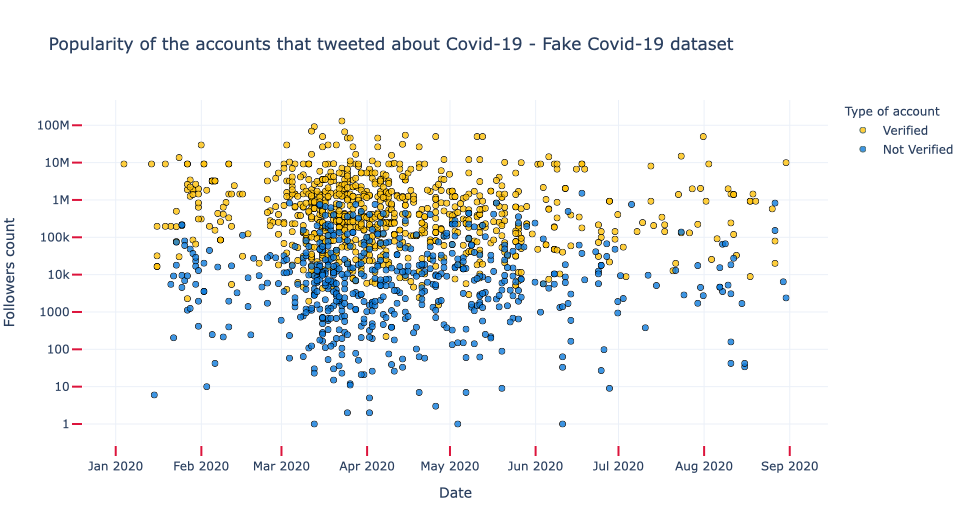